# Topological ordering using BFS
## Algorithm
1. Maintain a list of indegree of verices.
2. Choose the vertex or vertices which has/have 0 as their indegree.
3. Add them to the queue.
    1. For every vertex in the queue, check if any vertex has any incoming edge to it from the current vertex.
    2. If such a vertex is found, decrement its indegree by 1.
4. Repeat steps 2 to 3 until the indegree of all the edges becomes 0.
5. The contents of the queue in reverse order gives a topological order of the graph.
***
## Wrapper Class for Graph Visualization

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjancency_matrix = [], isDirected = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjancency_matrix) > 0:
            for i in range(len(adjancency_matrix)):
                for j in range(len(adjancency_matrix[i])):
                    if adjancency_matrix[i][j] <= 0: continue
                    self.G.add_edge(i+1, j+1, weight = adjancency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10**5
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

## Initializing the graph

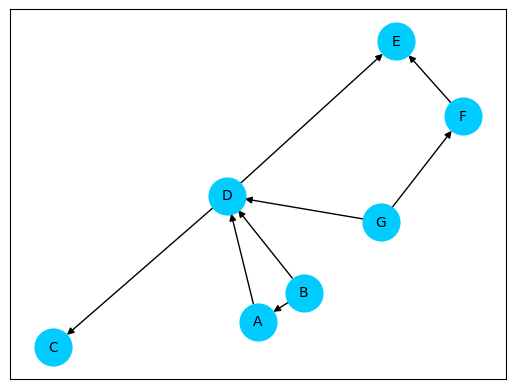

In [3]:
edgeList = [
    ('B', 'A', 1),
    ('B', 'D', 1),
    ('A', 'D', 1),
    ('D', 'C', 1),
    ('D', 'E', 1),
    ('G', 'D', 1),
    ('G', 'F', 1),
    ('F', 'E', 1)
]
G1 = GraphVisualization(weighted = False, edge_list = edgeList, isDirected = True)
G1.visualize()

***
## Function to convert from edge-list to adjancency-matrix

In [4]:
def edge_list_to_adjacency_matrix(edge_list, directed=False):
    # get number of vertices
    s = set()
    for i in edge_list:
        s.add(i[0]); s.add(i[1])
    num_vertices = len(s)
    s = list(s)
    # Initialize an n x n matrix with all 0's
    adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    # Iterate through each edge in the edge list
    for edge in edge_list:
        u, v = edge[:2]  # Get the vertices of the edge
        adj_matrix[ord(u) - 65][ord(v) - 65] = edge[2]  # Mark edge u -> v with 1 (or edge weight if any)
        
        if not directed:
            adj_matrix[ord(v) - 65][ord(u) - 65] = edge[2]  # For undirected graphs, also mark edge v -> u
        else: adj_matrix[ord(v) - 65][ord(u) - 65] = -edge[2]
    
    return adj_matrix

In [5]:
adjacency_matrix = edge_list_to_adjacency_matrix(edgeList, directed = True)
adjacency_matrix

[[0, -1, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, -1, 0, 0, 0],
 [-1, -1, 1, 0, 1, 0, -1],
 [0, 0, 0, -1, 0, -1, 0],
 [0, 0, 0, 0, 1, 0, -1],
 [0, 0, 0, 1, 0, 1, 0]]

In [15]:
incidence_list = {}
for i in range(len(adjacency_matrix)):
    s = 0
    for j in adjacency_matrix[i]:
        if j > 0: s += 1
    incidence_list[i] = s
incidence_list

{0: 1, 1: 2, 2: 0, 3: 2, 4: 0, 5: 1, 6: 2}

In [52]:
sorted_incidence_list = {k: v for k, v in sorted(incidence_list.items(), key=lambda item: item[1])}
sorted_incidence_list

{2: 0, 4: 0, 0: 1, 5: 1, 1: 2, 3: 2, 6: 2}

## Driver code

In [53]:
queue = [i for i in sorted_incidence_list.keys() if sorted_incidence_list[i] == 0]
top_arr = []

while len(sorted_incidence_list) > 0:
    for i in queue:
        if i not in top_arr: top_arr.append(i)
    for i in queue:
        # delete the edges
        if i in sorted_incidence_list.keys(): del sorted_incidence_list[i]
        
        for j in range(len(adjacency_matrix)):
            if j == i or j in queue: continue
            if adjacency_matrix[j][i] > 0: sorted_incidence_list[j] = sorted_incidence_list[j] - 1
    # update the queue
    queue = [i for i in sorted_incidence_list.keys() if sorted_incidence_list[i] == 0]

top_arr.reverse()

In [54]:
for i in top_arr:
    print(chr(i + 65), end = " ")

B G A D F E C 

**Note:** Topological ordering of a DAG is not unique.
***